# HW1 Linear regression and Newton's method

### input data

- File name : file contained mulit pairs (x,y)
- N : the number of polynomial of basis
- Lambda : rLSE parameter

### output

- vector : contain polynomail parameters (length : N)
- error : rLSE or LSE
- polynomial equation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex

In [2]:
def tranpose_matrix(m):
    row = len(m);
    col = len(m[0]);
    t = [];
    for i in range(col):
        t.append([m[j][i] for j in range(row)])
        
    return t;

def mul_matrix(a, b):
    row = len(a);
    mid = len(a[0]);
    if (mid != len(b)):
        return None;
    col = len(b[0]);
    r = [];
    for i in range(row):
        r.append([sum([a[i][k] * b[k][j] for k in range(mid)]) for j in range(col)])
    
    return r;

def add_matrix(a, b):
    if len(a) != len(b) or len(a[0]) != len(b[0]):
        raise Exception("row col not the same\n ({}, {}) != ({}, {})".format(len(a), len(a[0]), len(b), len(b[0])))
    c = []
    for i in range(len(a)):
        c.append(list(map(lambda x,y:x+y,a[i],b[i])))
    
    return c;

def sub_matrix(a, b):
    if len(a) != len(b) or len(a[0]) != len(b[0]):
        raise Exception("row col not the same\n ({}, {}) != ({}, {})".format(len(a), len(a[0]), len(b), len(b[0])))
    c = []
    for i in range(len(a)):
        c.append(list(map(lambda x,y:x-y,a[i],b[i])))
    
    return c;

def mul_matrix_scalar(s, m):
    if type(m) != list:
        raise Exception("type error : " + str(type(m)))

    r = [];
    for i in m:
        r.append([j*s for j in i])
    
    return r;
        
def unit_matrix(n):
    unit = [];
    for i in range(n):
        unit.append([1 if i == j else 0 for j in range(n)])
    return unit

def solve_X_by_LU(L, U, y):
    x = [0 for _ in range(len(y))];
    Ux = [];
    for i in range(len(y)):
        tmp = y[i]
        for j in range(i):
            tmp = tmp - Ux[j]*L[i][j]
        Ux.append(tmp)
    for i in reversed(range(len(Ux))):
        tmp = Ux[i]
        for j in range(len(Ux) - i - 1):
            j = j + i + 1
            tmp = tmp - x[j]*U[i][j] 
        x[i] = tmp / U[i][i]
        
    return x;
    
def inverse_matrix(m):
    row = len(m)
    col = len(m[0])
    if (row != col):
        return None;
    L = unit_matrix(row);
    U = [list(m[i]) for i in range(row)];
    for i in range(row):
        for j in range(col):
            if j >= i:
                continue;
            L[i][j] = U[i][j]/U[j][j];
            U[i] = list(map(lambda x,y:x - (L[i][j] * y) , U[i], U[j]))
    
    b = unit_matrix(row)
    inverse_m = [];
    for i in b:
        inverse_m.append(solve_X_by_LU(L, U, i))
    inverse_m = tranpose_matrix(inverse_m)
    return inverse_m;

In [3]:
def polynomial_basis(x, n):
    return x**n;

class polynomial_equation():
    def __init__(self, x_v):
        self.x_vector = x_v
        self.f = lambda x:sum([basis(x, i)*self.x_vector[-1-i][0] for i in range(len(self.x_vector))]);
    
    def __str__(self):
        r = "$$"
        r = r + "y = "
        for n in reversed(range(len(self.x_vector))):
            w = self.x_vector[-1-n][0]
            if (w == 0):
                continue;
            
            r = r + '{:+.2f}'.format(w)
            if (n != 0):
                r = r + 'x^{}'.format(n)
        r = r + "$$"
        return r;
    
    def rLSE(self, x, y, Lambda=1.0):
        loss = 0;
        for i in range(len(x)):
            loss = loss + (self.f(x[i]) - y[i])**2
        for i in range(len(self.x_vector)):
            loss = loss + Lambda*self.x_vector[i][0]**2
        return loss;

basis = polynomial_basis;

In [4]:
def convert_data_Ab(datas, N):
    # create matrix
    A = [];
    b = [];

    for index, row in datas.iterrows():
        b.append([row['y']])
        A.append([basis(row['x'], (N - 1) - i) for i in range(N)])
    
    return (A,b)

def linear_regression(datas, N = 2, Lambda = 1.0):
    A,b = convert_data_Ab(datas, N)
    
    ATA = mul_matrix(tranpose_matrix(A), A)
    ATA_Lambda = add_matrix(ATA, mul_matrix_scalar(Lambda, unit_matrix(N)))
    x_vector = mul_matrix( inverse_matrix(ATA_Lambda), tranpose_matrix(A))
    x_vector = mul_matrix(x_vector, b)
    
    return x_vector;

In [5]:
# config

input_file = "data.csv";
N = 4;
Lambda = 1.0;

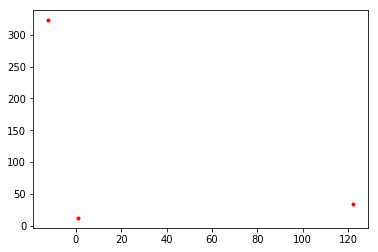

,x,y
0,1,12
1,122,34
2,-12,323


In [6]:
# load input and show data points

input_data = pd.read_csv(input_file, header=None, names=['x', 'y'])
plt.plot(input_data['x'], input_data['y'], 'r.')
plt.show()
input_data

In [7]:
# create matrix

A = [];
x_vector = [[0] for _ in range(N)];
b = [];

for index, row in input_data.iterrows():
    b.append([row['y']])
    A.append([basis(row['x'], (N - 1) - i) for i in range(N)])

In [8]:
pd.DataFrame(A)

,0,1,2,3
0,1,1,1,1
1,1815848,14884,122,1
2,-1728,144,-12,1


In [9]:
pd.DataFrame(x_vector)

,0
0,0
1,0
2,0
3,0


In [10]:
pd.DataFrame(b)

,0
0,12
1,34
2,323


In [11]:
ATA = mul_matrix(tranpose_matrix(A), A)
ATA_Lambda = add_matrix(ATA, mul_matrix_scalar(Lambda, unit_matrix(N)))
x_vector = mul_matrix( inverse_matrix(ATA_Lambda), tranpose_matrix(A))
x_vector = mul_matrix(x_vector, b)

In [12]:
x_vector = linear_regression(input_data, 3)

In [13]:
pd.DataFrame(x_vector)

,0
0,0.188303
1,-22.848022
2,18.779456


In [14]:
answer_line = polynomial_equation(x_vector)

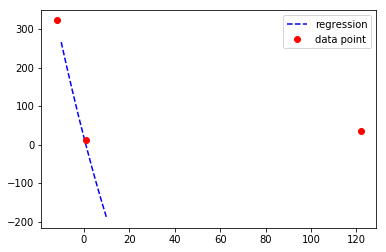

In [15]:
x_range = [i/100 for i in range(-1000,1000)]
y_range = [answer_line.f(x) for x in x_range]
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data['x'], input_data['y'], 'ro', label='data point')
plt.legend()
plt.show()

# Gen data from sin function with noise

In [16]:
import random
import math
x_range = [i/100 for i in range(0,700)]
sin_data = []
random_dis = [random.random() for i in range(10)]
random_dis = [sum(random_dis[0:i+1])/sum(random_dis) for i in range(9)]

for i in random_dis:
    x = x_range[round(i*len(x_range))]
    y = math.sin(x) * (0.9 + 0.2*random.random())
    sin_data.append([x,y])

In [17]:
input_data_sin = pd.DataFrame(sin_data)
input_data_sin.columns = ['x', 'y']
input_data_sin

,x,y
0,1.29,0.929938
1,1.81,0.906251
2,2.05,0.842005
3,2.46,0.577065
4,3.46,-0.335498
5,4.77,-0.921153
6,4.90,-0.936039
7,5.04,-0.909047
8,6.54,0.244848


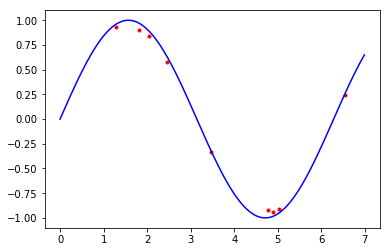

,x,y
0,1,12
1,122,34
2,-12,323


In [18]:
#input_data = pd.read_csv(input_file, header=None, names=['x', 'y'])
plt.plot(input_data_sin['x'], input_data_sin['y'], 'r.')
plt.plot(x_range, [math.sin(x) for x in x_range], 'b')
plt.show()
input_data

# Linear regression

[[0.07511904892369493], [-0.7142604226675117], [1.4837846818057763], [0.09292301074449036]]


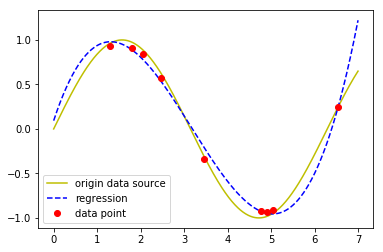

In [19]:
x_vector = linear_regression(input_data_sin, 4, 0)
print(x_vector)
answer_line = polynomial_equation(x_vector)
y_range = [answer_line.f(x) for x in x_range]
plt.plot(x_range, [math.sin(x) for x in x_range], 'y', label='origin data source')
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data_sin['x'], input_data_sin['y'], 'ro', label='data point')
plt.legend()
plt.show()

In [20]:
Latex(str(answer_line))

<IPython.core.display.Latex object>

In [21]:
answer_line.rLSE(input_data_sin['x'], input_data_sin['y'], 0)

0.02592260317624679

## Newton's method in optimization

use n=2 Taylor series and newton's method for optimization

$$ \\
x_1 = x_{0} - \frac{f^{'}(x_0)}{f^{''}(x_0)} $$

can present this format when high dimension

$$ \\
\vec{x_1} = \vec{x_0} - Hf(\vec{x_0})^{-1} \nabla f(\vec{x_0}) \\
Hf(x_0)^{-1} = 
\left [ \begin{array}{cc} 
\frac{\partial^2f}{\partial {x_0}^2} & \frac{\partial^2f}{\partial {x_0}{x_1}} & \cdots & \frac{\partial^2f}{\partial {x_0}{x_n}} \\
\frac{\partial^2f}{\partial {x_1}{x_0}} & \frac{\partial^2f}{\partial {x_1}^2} & \cdots & \frac{\partial^2f}{\partial {x_1}{x_n}} \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2f}{\partial {x_n}{x_0}} & \frac{\partial^2f}{\partial {x_n}{x_1}} & \cdots & \frac{\partial^2f}{\partial {x_n}^2} 
\end{array} \right ]$$

### LSE

$$ \\
LSE = f(x) = ||A\vec{x}-\vec{b}||^2 = x^TA^TA\vec{x} - 2x^TA^T\vec{b} + \vec{b}^T\vec{b} \\
\nabla f(\vec{x}) = f^{'}(x) = 2A^TA\vec{x} - 2A^T\vec{b}\\
Hf(\vec{x}) = f^{''}(x) = 2A^TA \\
\\
\vec{x_1} = \vec{x_0} - (2A^TA)^{-1}(2A^TA\vec{x_0} - 2A^T\vec{b}) \\
$$

In [22]:
def inter_newton(x0, A, b):
    AT = tranpose_matrix(A)
    hession = mul_matrix(mul_matrix_scalar(2, AT), A)
    inverse_hession = inverse_matrix(hession)
    nabla = sub_matrix(mul_matrix(hession, x0), mul_matrix(mul_matrix_scalar(2,AT), b))
    x_gradient = mul_matrix(inverse_hession, nabla)
    x1 = sub_matrix(x0, x_gradient)
    return x1

def newton(datas, N = 2, delta = 0.001, x_init = None, over_iter = 2):
    A,b = convert_data_Ab(datas, N)
    
    if (x_init != None):
        x_old = [[x_init[i][0]] for i in range(N)]
    else:
        x_old = [[0] for _ in range(N)]
    
    while True:
        x_new = inter_newton(x_old, A, b)
        
        x_delta = sub_matrix(x_new, x_old)
        x_delta = mul_matrix(tranpose_matrix(x_delta), x_delta)
        
        if x_delta[0][0] < delta:
            if over_iter <= 0:
                break
            else:
                over_iter = over_iter - 1
        
        x_old = x_new
    
    return x_new

[[0.07511904892365703], [-0.7142604226670666], [1.4837846818042362], [0.09292301074608318]]


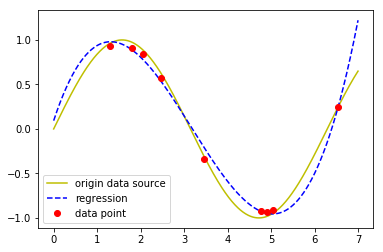

In [23]:
x_newton = newton(input_data_sin, 4)
print(x_newton)
answer_line_newton = polynomial_equation(x_newton)
y_range = [answer_line_newton.f(x) for x in x_range]
plt.plot(x_range, [math.sin(x) for x in x_range], 'y', label='origin data source')
plt.plot(x_range, y_range, 'b--', label='regression')
plt.plot(input_data_sin['x'], input_data_sin['y'], 'ro', label='data point')
plt.legend()
plt.show()

In [24]:
Latex(str(answer_line_newton))

<IPython.core.display.Latex object>

In [25]:
answer_line_newton.rLSE(input_data_sin['x'], input_data_sin['y'], 0)

0.025922603176246787

In [26]:
Latex(str(answer_line))

<IPython.core.display.Latex object>

In [27]:
answer_line_newton.rLSE(input_data_sin['x'], input_data_sin['y'], 0) - answer_line.rLSE(input_data_sin['x'], input_data_sin['y'], 0)

-3.469446951953614e-18